# Latar Belakang
perusahaan ingin berfokus pada pengembangan solusi kecerdasan buatan dan analitik data untuk industri transportasi. dengan menggabungkan teknologi canggih dengan pemahaman mendalam tentang pergerakan manusia dan transportasi untuk membantu penyedia layanan transportasi mengoptimalkan operasional, meningkatkan pengalaman pengguna, dan memitigasi risiko.

## Pernyataan Masalah
Dengan fokus pada inovasi, analisis data yang mendalam, dan penerapan kecerdasan buatan, penyedia layanan transportasi ingin **meningkatkan efisiensi operasional, memaksimalkan kepuasan pengguna, dan meraih kesuksesan jangka panjang**.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

1. Segmentasi Pengguna
* Bagaimana menerapkan segmentasi untuk mengidentifikasi berbagai kelompok pengguna berdasarkan pola dan karakteristik pengguna? 
* Bagaimana dapat memberikan layanan yang lebih sesuai dengan kebutuhan masing-masing segmen?

2. Prediksi Pola Perjalanan
* Bagaimana membangun model deskriptif yang akurat untuk memprediksi pola perjalanan pengguna berdasarkan data historis transaksi?
* Bagaimana pengaruh variabel seperti waktu dan pemberhentian terhadap pola perjalanan?

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan.

In [1]:
# import module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# filtering warings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi yang relevan untuk merekam dan menganalisis data transaksi pembayaran transportasi. Ada 22 kolom di dalam dataset Transjakarta, yaitu:  

* `transID`          : Unique transaction id for every transaction
* `payCardID`        : Customers main identifier. The card customers use as a ticket for entrance and exit.
* `payCardBank`      : Customers card bank issuer name
* `payCardName`      : Customers name that is embedded in the card.
* `payCardSex`       : Customers sex that is embedded in the card
* `payCardBirthDate` : Customers birth year
* `corridorID`       : Corridor ID / Route ID as key for route grouping.
* `corridorName`     : Corridor Name / Route Name contains Start and Finish for each route.
* `direction`        : 0 for Go, 1 for Back. Direction of the route.
* `tapInStops`       : Tap In (entrance) Stops ID for identifying stops name
* `tapInStopsName`   : Tap In (entrance) Stops Name where customers tap in.
* `tapInStopsLat`    : Latitude of Tap In Stops
* `tapInStopsLon`    : Longitude of Tap In Stops
* `stopStartSeq`     : Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
* `tapInTime`        : Time of tap in. Date and time
* `tapOutStops`      : Tap Out (Exit) Stops ID for identifying stops name
* `tapOutStopsName`  : Tap out (exit) Stops Name where customers tap out.
* `tapOutStopsLat`   : Latitude of Tap Out Stops
* `tapOutStopsLon`   : Longitude of Tap Out Stops
* `stopEndSeq`       : Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
* `tapOutTime`       : Time of tap out. Date and time
* `payAmount`        : The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [2]:
# import dataset
dfraw=pd.read_csv('F:\Purwadhika_School\Project\Capstone_Project_Module_2\\raw\Transjakarta.csv')
# show dataset
display(dfraw.head(),dfraw.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset Transjakarta.

In [3]:
print(f'Jumlah baris dan kolom di dataset dfraw adalah {dfraw.shape}')
dfraw.info()

Jumlah baris dan kolom di dataset dfraw adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-

In [4]:
display(dfraw.describe(), dfraw.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
pd.set_option('display.max_colwidth', 250)
pd.DataFrame(
    {
    'feature':dfraw.columns.values,
    'n_unique': dfraw.nunique().values,
    'sample_unique': [dfraw[col].unique() for col in dfraw.columns]
    }
)

,feature,n_unique,sample_unique
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN5..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977,..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q, 5M, M7B, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M1, 7E, 1P, 7D, 6H, 14, BW9, JIS3, 2, JAK.15, 6N, M11, JAK.112, 9N, JAK.43B, JAK.42, 7P, JAK.36, 13B, JAK.0..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, Cibubur - Balai Kota, Kalibata - Kuningan, nan, Bekasi Barat - Kuningan, Rempoa - Blok M, Kampung Me..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B00243P, B03416P, B00795P, B05781P, B05433P, P00254, P00281, P00159, B00608P, B05291P, P00096, B00058P, P00093, B00722P, P00206, nan, P00259, B02335P, B05023P, P00233, B05833P, B06299P, B06040P..."


Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 22 kolom dan 37.900 baris
* beberapa kolom, yaitu, `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` dan `payAmount` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Value

In [6]:
# persentase missing value di tiap kolom
dfraw.isna().sum()/dfraw.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

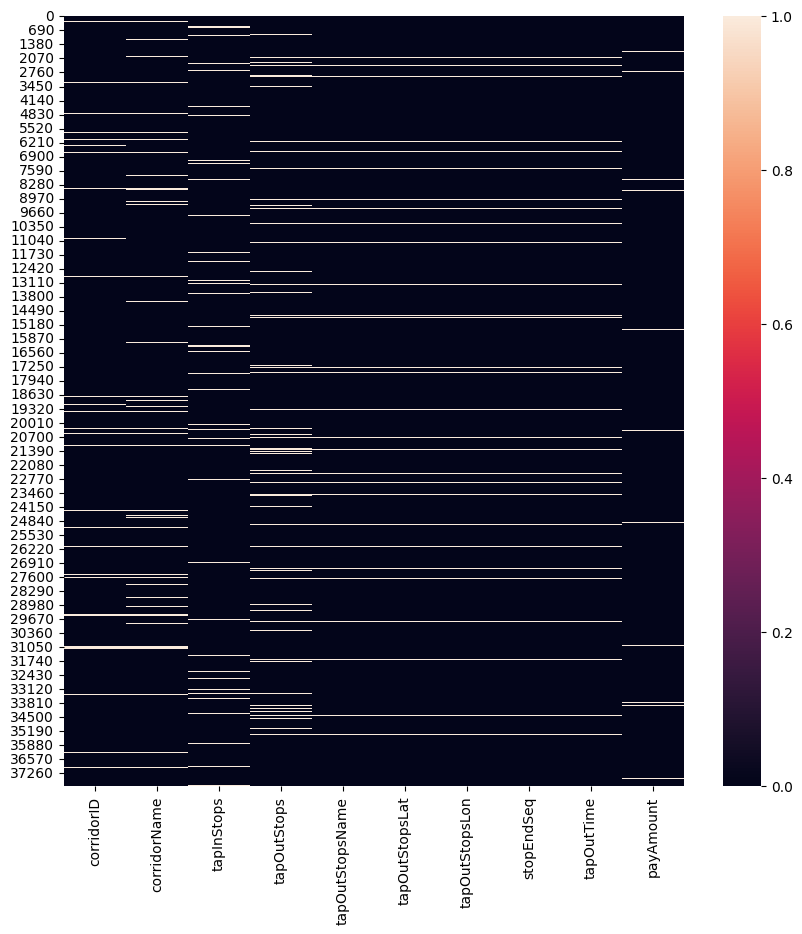

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(dfraw[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Secara garis besar:  
* *missing value* di kolom `corridorName` dan `tapOutStops` memiliki proporsi yang cukup tinggi (>5%)
* *missing value* di kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStopsName` kosong, maka kemungkinan besar data di `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini dapat digunakan pada beberapa kasus yang sedang kita hadapi saat ini.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

### Cleaning

#### `tapInStops`
Sebelum memulai, mari kita tentukan nilai dari `tapInStops` berdasarkan nilai dari `tapInStopsName`.

In [8]:
# Isi value yang kosong berdasarkan kolom
dfraw['tapInStops'].fillna(dfraw.groupby('tapInStopsName')['tapInStops'].transform('first'), inplace=True)

# drop nilai jika tidak ada nilai yang sama didalam `tapInStopsName` 
dfraw.dropna(subset=['tapInStops'], inplace=True)

#### `tapOutStops` dan `tapOutStopsName`

mari kita tentukan nilai dari `tapOutStops` dan `tapOutStopsName` berdasarkan nilai dari kedua kolom tersebut dan berdasarkan nilai 

In [9]:
# Drop baris dengan kolom tapOutStops dan tapOutStopsName yang keduanya `nan`
dfraw.dropna(subset=['tapOutStops', 'tapOutStopsName'], how='all', inplace=True)

# Isi value yang kosong berdasarkan kolom `tapOutStopsName` dan `tapOutStops`
dfraw['tapOutStops'].fillna(dfraw.groupby('tapOutStopsName')['tapOutStops'].transform('first'), inplace=True)
dfraw['tapOutStopsName'].fillna(dfraw.groupby('tapOutStops')['tapOutStopsName'].transform('first'), inplace=True)

#### `corridorID` dan `coridorName`

mari kita tentukan nilai dari `corridorID` dan `coridorName` berdasarkan nilai dari kedua kolom tersebut dan nilai dari `tapInStops` dan `tapOutStops`

In [10]:
# Isi nilai yang kosong berdasarkan kolom `corridorName` dan `corridorId`
dfraw['corridorID'].fillna(dfraw.groupby('corridorName')['corridorID'].transform('first'), inplace=True)
dfraw['corridorName'].fillna(dfraw.groupby('corridorID')['corridorName'].transform('first'), inplace=True)

# jika nilai tidak ada didalam `corridorName` dan `corridorId` cari menggunakan `tapInStops` dan `tapOutStops`
dfraw['corridorID'].fillna(dfraw.groupby('tapInStops')['corridorID'].transform('first'), inplace=True)
dfraw['corridorName'].fillna(dfraw.groupby('tapInStops')['corridorName'].transform('first'), inplace=True)

dfraw['corridorID'].fillna(dfraw.groupby('tapOutStops')['corridorID'].transform('first'), inplace=True)
dfraw['corridorName'].fillna(dfraw.groupby('tapOutStops')['corridorName'].transform('first'), inplace=True)

#### `payAmount`
mari kita ubah nilai *nan* di kolom `payAmount` menjadi nilai yang seharusnya berdasarkan `corridorID` yang digunakan.

In [11]:
# Menggantikan nilai 'nan' pada `payAmount` berdasarkan `corridorID` dan `payAmount` 
dfraw[dfraw["payAmount"].isna()].groupby('corridorID').count()
nanpayment = ["3H", "JAK.48A", "JAK.48B", "M1H", "M7B"]         # `corridorID` yang memiliki nilai nan pada bagian `payAmount`

# check `corridorID` pada setiap `payAmount`
dfraw[dfraw["payAmount"]==3500]["corridorID"].unique()          # TransJakarta
dfraw[dfraw["payAmount"]==20000]["corridorID"].unique()         # RoyalTrans
dfraw[dfraw["payAmount"]==0]["corridorID"].unique()             # MikroTrans

# drop row based on `corridorID`
dropped = ["M1H","M7B"] # <- nilai didrop dikarenakan tidak ada informasi yang dapat digunakan untuk mengisi nilai tersebut baik dari dataset ataupun website https://transjakarta.co.id/peta-rute/
dfraw = dfraw[~dfraw['corridorID'].isin(dropped)]

# `corridorID`
Mikrotrans = ['JAK.18', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B', 'BW9','JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06',
               'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19','JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C', '2F',
               'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E', 'JAK.13','JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22', 'JAK.115',
               'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01', 'JAK.120','JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86', '9F', '11P',
               'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45', 'JAK.110A','JAK.51', 'JAK.54', 'JAK.03', 'JAK.25', 'JAK.39', 'JAK.80',
               'JAK.11', 'JAK.17', '11K', '10B', 'JAK.30', 'JAK.58', 'JAK.34','10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
               'JAK.113', 'JAK.04', '12F', 'JAK.61', 'JAK.24', '11C', 'JAK.35','JAK.38', 'JAK.33', 'JAK.05', '11B', 'JAK.106', 'JAK.28', 'JAK.53', 'JAK.99', 'JAK.12',
               'JAK.48A', 'JAK.48B'] # <- JAK.48A dan JAK.48B `corridorID` ditambah secara manual melalui website https://transjakarta.co.id/peta-rute/ dikarenakan tidak ada nilai dari dataset yang bisa mengisi nilai tersebut 

TransJakarta = ['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13', '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
                '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7', '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
                '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M', 'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
                '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12', '1N', 'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3', 'M6',
                '8', '6D', '1H', '4C', 'M13', '8D', '4D', '7', '9C', 'D21', 'D11', '8M', '1B', '12H', '7F', '6', '10H', '3E', '9', '1A', '2Q', '1R', '7B', 'M5',
                '3H'] # <- 3H `corridorID` ditambah secara manual melalui website https://transjakarta.co.id/peta-rute/ dikarenakan tidak ada nilai dari dataset yang bisa mengisi nilai tersebut 

RoyalTrans = ['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']

# ubah nilai 'nan' pada `payAmount`
dfraw.loc[dfraw['corridorID'].isin(Mikrotrans), 'payAmount'] = 0
dfraw.loc[dfraw['corridorID'].isin(TransJakarta), 'payAmount'] = 3500
dfraw.loc[dfraw['corridorID'].isin(RoyalTrans), 'payAmount'] = 20000

#### Time Formating dan Kolom Baru `tripTime`
mari kita format kolom `tapInTime` dan `tapOutTime` ke format datetime dan buat kolom `tripTime` berisi lamanya waktu tempuh perjalanan berdasarkan kolom `tapInTime` - `tapOutTime`.

In [12]:
# ubah format `tapInTime` dan `tapOutTime` menjadi format datetime 
dfraw["tapInTime"] = pd.to_datetime(dfraw["tapInTime"])
dfraw["tapOutTime"] = pd.to_datetime(dfraw["tapOutTime"])

# ukur `tripTime` berdasarkan `tripOutTime` - `tapInTime`
dfraw["tripTime"] = dfraw["tapOutTime"] - dfraw["tapInTime"]

#### Kolom Baru `startHour`
mari kita buat kolom `startHour` berdasarkan `tapInTime` berisikan jam berangkat pengguna.

In [13]:
dfraw["startHour"] = dfraw["tapInTime"].dt.hour # ambil nilai jam dari `tapInTime`

#### Kolom Baru `tripMinutes`
mari kita buat kolom `tripMinutes` berdasarkan `tripTime` berisikan berapa lama perjalanan pengguna.

In [14]:
minutes_tripTime = dfraw['tripTime'].dt.seconds / 60 # ambil nilai menit dari `tripTime`
median_tripTime = minutes_tripTime.median()          # ambil nilai median dari *minutes_tripTime*

# variable yang dapat digunakan untuk merubah outliers menjadi median
Q1 = minutes_tripTime.quantile(0.25)                 # quartil 1
Q3 = minutes_tripTime.quantile(0.75)                 # quartil 3
IQR = Q3 - Q1                                        # interkuartil
lower_bound = Q1 - 1.5 * IQR                         # lower bound
upper_bound = Q3 + 1.5 * IQR                         # upper bound

# ubah nilai outliers menjadi median lalu simpan di kolom `tripMinutes`
dfraw["tripMinutes"] = minutes_tripTime.where((minutes_tripTime >= lower_bound) & (minutes_tripTime <= upper_bound), median_tripTime)

#### Kolom Baru `age` dan `ageGroup`
mari kita buat kolom `age` berisikan usia yang digunakan berdasarkan *2023* - `payCardBirthDate` dan kolom `ageGroup` berisikan pengelompokan usia berdasarkan `age` yang dibagi menjadi:
* anak-anak : usia 0 - 12 tahun
* remaja    : usia 13 - 25 tahun
* dewasa    : usia 26 - 50 tahun
* lansia    : usia 50 tahun dan seterusnya

In [15]:
# membuat kolom baru berisikan umur pengguna
dfraw['age'] = 2023 - dfraw['payCardBirthDate']

# membuat fungsi dan label untuk menentukan `ageGroup` dari `age`
def determine_age_group(row):
    if row["age"] <= 12:
        return "anak - anak"
    elif (row["age"] >= 13) & (row["age"] <= 25):
        return "remaja"
    elif (row["age"] >= 26) & (row["age"] <= 50):
        return "dewasa"
    else : return "lansia"

# Menerapkan fungsi untuk membuat kolom `ageGroup`
dfraw['ageGroup'] = dfraw.apply(determine_age_group, axis=1)

#### Kolom Baru `busType`
mari kita buat kolom `busType` berisikan tipe bis yang digunakan berdasarkan `corridorID` dimana: 
* jika nilai `payAmount` dalam satu baris yang sama bernilai *20000* maka buat kolom `busType` dengan nilai *RoyalTrans* 
* jika nilai `payAmount` bernilai *3500* maka buat kolom `busType` dengan nilai *TransJakarta* 
* jika nilai `payAmount` bernilai *0.0* maka buat kolom `busType` dengan nilai *MikroTrans*

In [16]:
# Fungsi untuk mendefinisikan busType
def determine_bus_type(row):
    if row['payAmount'] == 20000:
        return 'RoyalTrans'
    elif row['payAmount'] == 3500:
        return 'TransJakarta'
    else:
        return "MikroTrans"

# Menerapkan fungsi untuk membuat kolom `busType`
dfraw['busType'] = dfraw.apply(determine_bus_type, axis=1)

#### Dropna dan Reset
kita drop sisa data yang tidak mengalami perubahan dan kita reset indexnya agar terlihat rapi, data yang didrop terjadi karena informasi dari pusat ataupun data tersebut kurang lengkap.

In [17]:
dfraw.dropna(inplace=True)
dfraw = dfraw.reset_index().drop(columns={'index'})

#### Check

In [18]:
pd.set_option('display.max_colwidth', 250)
pd.DataFrame(
    {
    'feature':dfraw.columns.values,
    'n_unique': dfraw.nunique().values,
    'sample_unique': [dfraw[col].unique() for col in dfraw.columns]
    }
)

,feature,n_unique,sample_unique
0,transID,36011,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO2..."
1,payCardID,1966,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 45563..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1959,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyan..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,66,"[2008, 1997, 1992, 1978, 1982, 1993, 1991, 2004, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1984, 1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987,..."
6,corridorID,219,"[5, 6C, R1A, 11D, 12, 1T, JAK.03, B14, 1Q, 5M, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M1, 7E, 1P, 7D, 6H, 14, BW9, JIS3, 2, JAK.15, 6N, M11, JAK.112, 9N, JAK.43B, JAK.42, 7P, JAK.36, 13B, JAK.06, JAK.14,..."
7,corridorName,214,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, Cibubur - Balai Kota, Lebak Bulus - Andara, Bekasi Barat - Kuningan, Rempoa - Blok M, Kampung Melayu..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2502,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B03416P, B00795P, B05781P, B05433P, P00281, P00159, B00608P, B05291P, P00096, B00058P, P00093, B00722P, P00206, B02144P, P00259, B02335P, B05023P, P00233, B05833P, B06299P, B06040P, P00183, B02..."


Hasil Setelah Data Cleaning:
* dataset Transjakarta memiliki 28 kolom dan 36.011 baris
* data yang dihapus 1.889 atau sekitar 4.99%
* kolom baru `age` dan `ageGroup` yang memiliki nilai sebagai usia dan pengelompokan usia dari perngguna
* kolom baru `busType` yang memiliki nilai sebagai tipe bis yang digunakan
* kolom baru `tripTime` yang memiliki nilai sebagai lamanya waktu tempuh perjalanan
* kolom baru `startHour` yang memiliki nilai sebagai jam berangkat pengguna
* kolom baru `tripMinutes` yang memiliki nilai sebagai lamanya menit perjalanan

In [19]:
display(dfraw.head(1),dfraw.tail(1))

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripTime,startHour,tripMinutes,age,ageGroup,busType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,0 days 00:39:09,5,39.15,15,remaja,TransJakarta


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripTime,startHour,tripMinutes,age,ageGroup,busType
36010,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.77752,7.0,2023-04-12 21:34:53,3500.0,0 days 00:26:41,21,26.683333,38,dewasa,TransJakarta


### Extracting Clean Dataset

In [20]:
#file_path = 'F:\Purwadhika_School\Project\Capstone_Project_Module_2\cleaned\cleaned.csv'
#dfraw.to_csv(file_path, index=False)

# Data Analisis

### 1. Segmentasi Pengguna:
 Identifikasi segmentasi pengguna berdasarkan Pengguna dan rute perjalanan guna membantu dalam menyusun layanan atau promosi yang sesuai untuk masing-masing segmen pengguna.

#### Usia

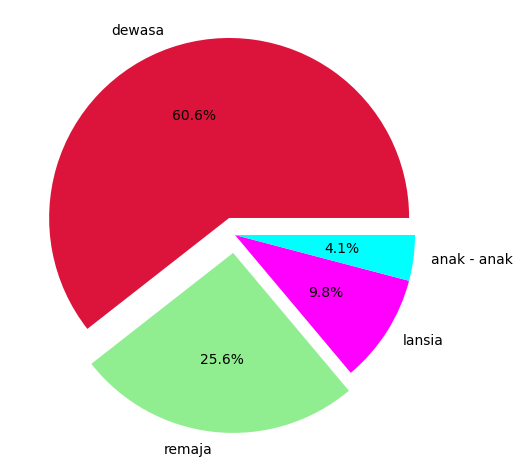

In [39]:
hue_orders = ["dewasa", "remaja", "lansia", "anak - anak"]
colors = ['crimson','lightgreen','magenta','aqua']
x = dfraw["ageGroup"].value_counts()
plt.pie(x,labels=hue_orders, autopct='%1.1f%%',explode=[0.1,0.1,0.0,0.0],colors=colors)

plt.tight_layout()
plt.show()

Insight:
* Mayoritas pengguna adalah dewasa.
* jumlah anak - anak dan lansia lebih rendah berbanding jauh jika dibandingkan dengan jumlah pengguna dewasa dan remaja,

##### Rute Populer Berdasarkan Usia

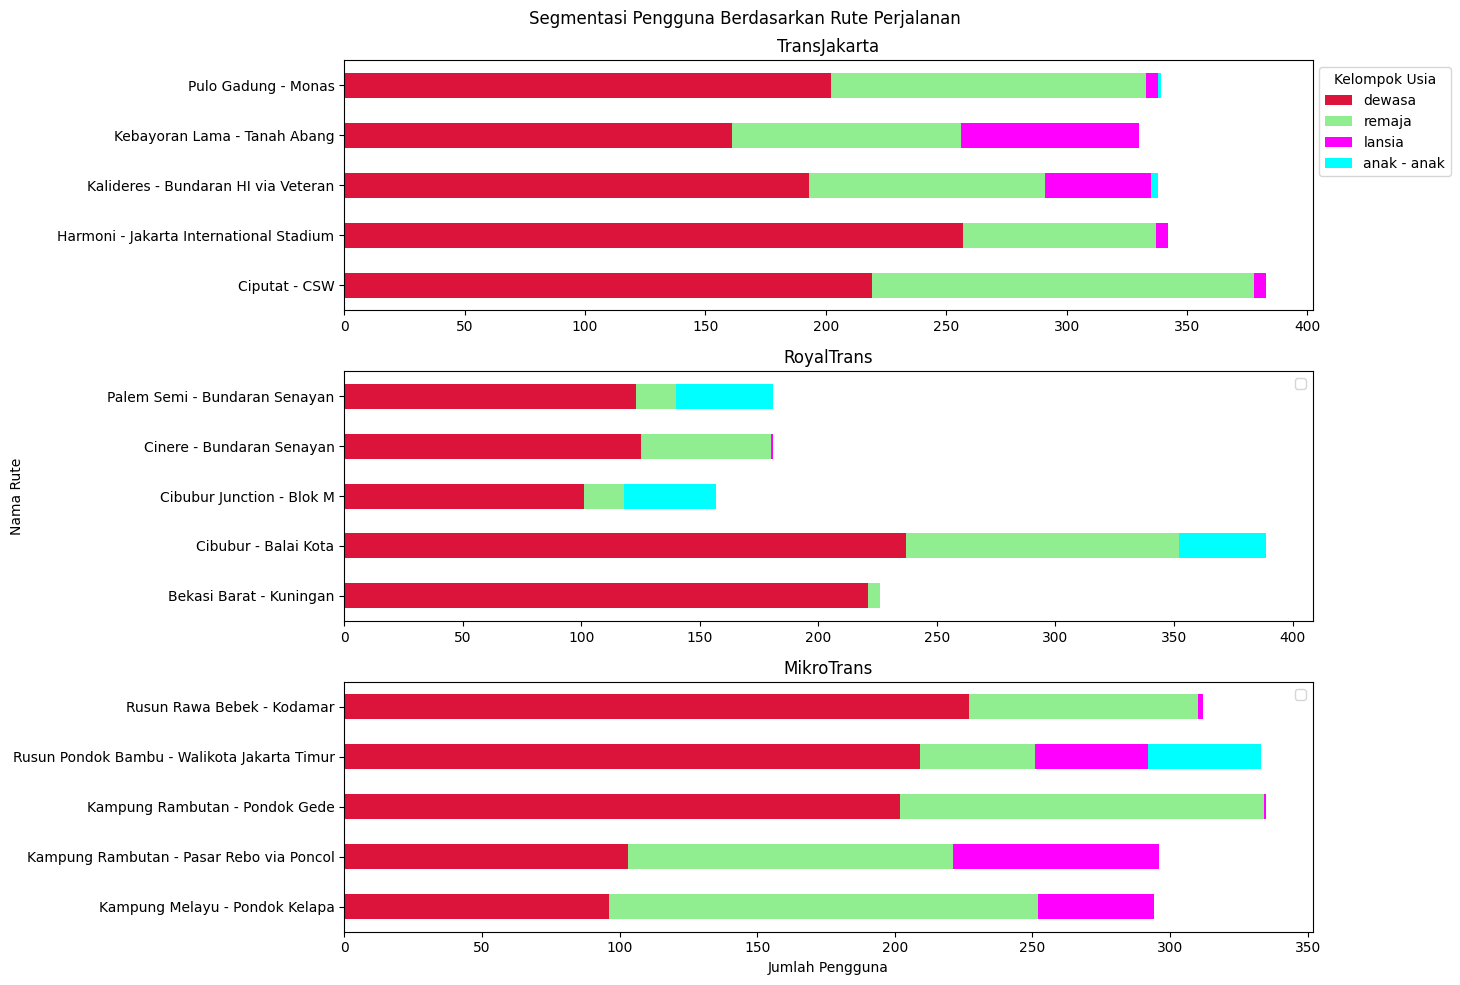

In [41]:
agegrouping = dfraw.copy()
agegrouping["ageGroup"] = agegrouping['ageGroup'].astype(pd.CategoricalDtype(categories=hue_orders, ordered=True))

# ambil 5 rute populer dari tiap `busType`
top5tr = agegrouping[agegrouping['busType'] == "TransJakarta"]['corridorName'].value_counts().nlargest(5).index.tolist()
top5rt = agegrouping[agegrouping['busType'] == "RoyalTrans"]['corridorName'].value_counts().nlargest(5).index.tolist()
top5mt = agegrouping[agegrouping['busType'] == "MikroTrans"]['corridorName'].value_counts().nlargest(5).index.tolist()

# Memfilter DataFrame hanya untuk koridor yang paling populer
counttr = agegrouping[(agegrouping['corridorName'].isin(top5tr)) & (agegrouping['busType'] == "TransJakarta")]
countrt = agegrouping[(agegrouping['corridorName'].isin(top5rt)) & (agegrouping['busType'] == "RoyalTrans")]
countmt = agegrouping[(agegrouping['corridorName'].isin(top5mt)) & (agegrouping['busType'] == "MikroTrans")]

# dataframe jumlah koridor untuk setiap kelompok usia
tr = counttr.groupby(['corridorName', 'ageGroup']).size().unstack(fill_value=0)
rt = countrt.groupby(['corridorName', 'ageGroup']).size().unstack(fill_value=0)
mt = countmt.groupby(['corridorName', 'ageGroup']).size().unstack(fill_value=0)

fig, axs = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Segmentasi Pengguna Berdasarkan Rute Perjalanan')

colors = {'anak - anak': 'aqua', 'remaja': 'lightgreen', 'dewasa': 'crimson', 'lansia': 'magenta'}

tr.plot(kind='barh', stacked=True, ax=axs[0], color=colors)
rt.plot(kind='barh', stacked=True, ax=axs[1], color=colors)
mt.plot(kind='barh', stacked=True, ax=axs[2], color=colors)

axs[0].legend(title='Kelompok Usia', bbox_to_anchor=(1.15, 1))
axs[1].legend("")
axs[2].legend("")
axs[0].set_title("TransJakarta")
axs[1].set_title("RoyalTrans")
axs[2].set_title("MikroTrans")
axs[0].set_ylabel('')
axs[1].set_ylabel('Nama Rute',labelpad=60)
axs[2].set_ylabel('')
axs[2].set_xlabel("Jumlah Pengguna")

plt.tight_layout()
plt.show()

Insight:
1. TransJakarta
* Rute "Ciputat - CSW" adalah rute yang paling populer
* tidak ada rute yang populer dikalangan anak - anak
* ada 2 rute yang populer dikalangan lansia yaitu "Kebayoran - Lama" dan "Kalideres Bundarah HI via veteran"
2. RoyalTrans
* Rute "Cibubur - Balai Kota" adalah rute yang paling populer
* tidak ada rute yang populer dikalangan lansia
* ada 3 rute yang populer dikalangan anak - anak yaitu "Palem Semi - Bundaran Senayan", "Cibubur Junction - Blok M" dan "Cibubur - Balai Kota"
3. MikroTrans
* Rute "Kampung Rambutan - Pondok Gede" adalah satu - satunya rute yang paling populer dkalangan anak - anak
* Rute yang paling populer adalah "Rusun Pondok Bambu - WaliKota Jakarta Timur" dan "Penjaringan" dan "Kampung Rambutan - Pondok Gede"

Sesuaikan jumlah armada dan frekuensi layanan berdasarkan popularitas rute dan kelompok usia pengguna. Rute-rute yang paling populer harus memiliki lebih banyak bus atau angkutan untuk mengatasi permintaan tinggi.

Untuk rute-rute yang populer di kalangan lansia dan anak-anak, pertimbangkan untuk menyediakan pelayanan khusus yang memenuhi kebutuhan mereka. Ini dapat mencakup kenyamanan tambahan, bantuan naik-turun, atau fasilitas khusus.

Pastikan bahwa informasi mengenai rute-rute populer dan layanan khusus diinformasikan dengan baik kepada pengguna. Gunakan berbagai media, termasuk papan informasi di halte dan aplikasi seluler, untuk memberikan informasi yang jelas dan akurat.

Jika rute tertentu sangat populer, pertimbangkan untuk mengembangkan rute alternatif yang mengurangi tekanan pada rute utama. Ini dapat membantu mengurangi kemacetan dan memperbaiki efisiensi operasional.

Penting untuk menjaga armada dalam kondisi yang baik dan memastikan keselamatan penumpang, terutama jika ada banyak anak-anak yang menggunakan layanan. Pastikan juga ada fasilitas yang aman dan nyaman di halte dan dalam angkutan.

Terus mengumpulkan data mengenai preferensi pengguna dan kinerja rute. Analisis data ini dapat membantu dalam pengambilan keputusan yang lebih baik untuk perbaikan dan penyesuaian layanan.

Untuk rute-rute yang tidak populer di kalangan anak-anak, pertimbangkan untuk melakukan kampanye pemasaran yang ditargetkan pada keluarga dan sekolah. Ini dapat membantu menarik lebih banyak penumpang dalam kelompok usia ini.

Kolaborasi dengan pihak terkait seperti pemerintah daerah, sekolah, dan pusat perbelanjaan dapat membantu dalam mengoptimalkan rute dan mempromosikan penggunaan transportasi umum.

Pertimbangkan untuk mengadopsi teknologi atau armada yang lebih ramah lingkungan, terutama jika ada peningkatan permintaan di rute-rute populer.

### 2. Prediksi Pola Perjalanan
Hal ini dapat membantu pemilik transportasi dalam perencanaan layanan dan optimalisasi rute.

#### A. Analisis Titik Awal dan Akhir Perjalanan

##### a. TransJakarta

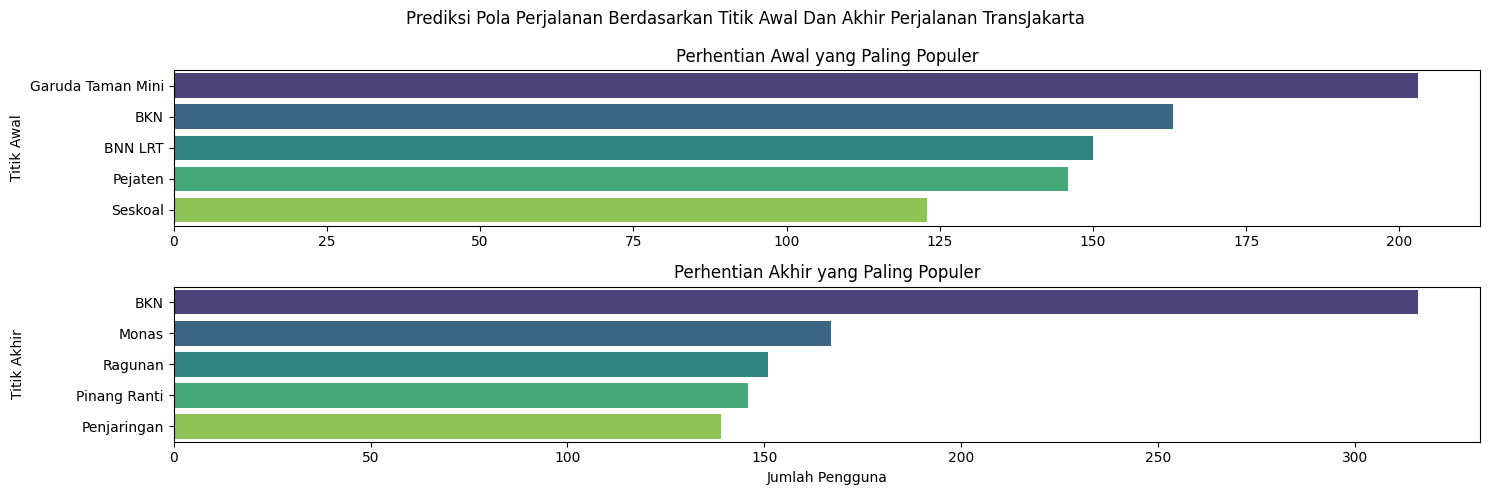

In [ ]:
x = dfraw[dfraw["busType"] == "TransJakarta"]

# Hitung frekuensi perhentian awal dan akhir
start_stops = x['tapInStopsName'].value_counts().nlargest(5).reset_index(name="count") # 5 titik awal paling populer
end_stops = x['tapOutStopsName'].value_counts().nlargest(5).reset_index(name="count")  # 5 titik akhir paling populer

fig = plt.figure(figsize=(15,5))
fig.suptitle('Prediksi Pola Perjalanan Berdasarkan Titik Awal Dan Akhir Perjalanan TransJakarta')

# Visualisasi perhentian awal
plt.subplot(2,1,1)
sns.barplot(
    data=start_stops,
    x="count",
    y="tapInStopsName",
    palette="viridis")
plt.title('Perhentian Awal yang Paling Populer')
plt.ylabel("Titik Awal")
plt.xlabel("")

# Visualisasi perhentian akhir
plt.subplot(2,1,2)
sns.barplot(
    data=end_stops,
    x="count",
    y="tapOutStopsName",
    palette="viridis")
plt.title('Perhentian Akhir yang Paling Populer')
plt.ylabel("Titik Akhir",labelpad=37)
plt.xlabel("Jumlah Pengguna")

plt.tight_layout()
plt.show()

##### b. RoyalTrans

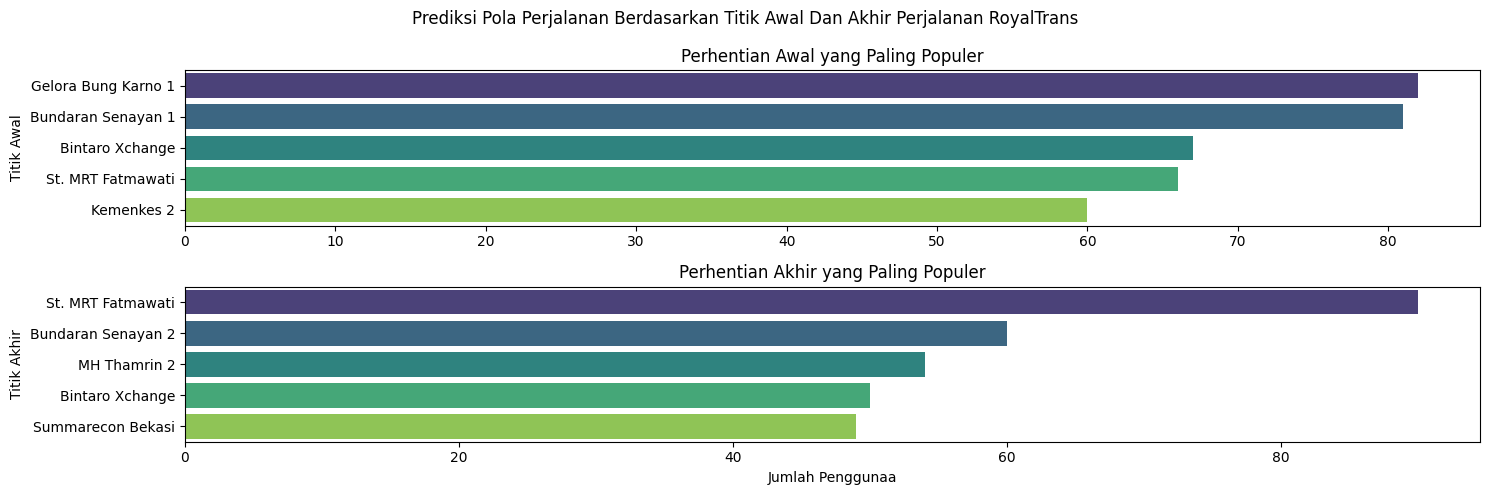

In [ ]:
x = dfraw[dfraw["busType"] == "RoyalTrans"]

# Hitung frekuensi perhentian awal dan akhir
start_stops = x['tapInStopsName'].value_counts().nlargest(5).reset_index(name="count") # 5 titik awal paling populer
end_stops = x['tapOutStopsName'].value_counts().nlargest(5).reset_index(name="count")  # 5 titik akhir paling populer

fig = plt.figure(figsize=(15,5))
fig.suptitle('Prediksi Pola Perjalanan Berdasarkan Titik Awal Dan Akhir Perjalanan RoyalTrans')

# Visualisasi perhentian awal
plt.subplot(2,1,1)
sns.barplot(
    data=start_stops,
    x="count",
    y="tapInStopsName",
    palette="viridis")
plt.title('Perhentian Awal yang Paling Populer')
plt.ylabel("Titik Awal")
plt.xlabel("")

# Visualisasi perhentian akhir
plt.subplot(2,1,2)
sns.barplot(
    data=end_stops,
    x="count",
    y="tapOutStopsName",
    palette="viridis")
plt.title('Perhentian Akhir yang Paling Populer')
plt.ylabel("Titik Akhir")
plt.xlabel("Jumlah Penggunaa")

plt.tight_layout()
plt.show()

##### c. MikroTrans

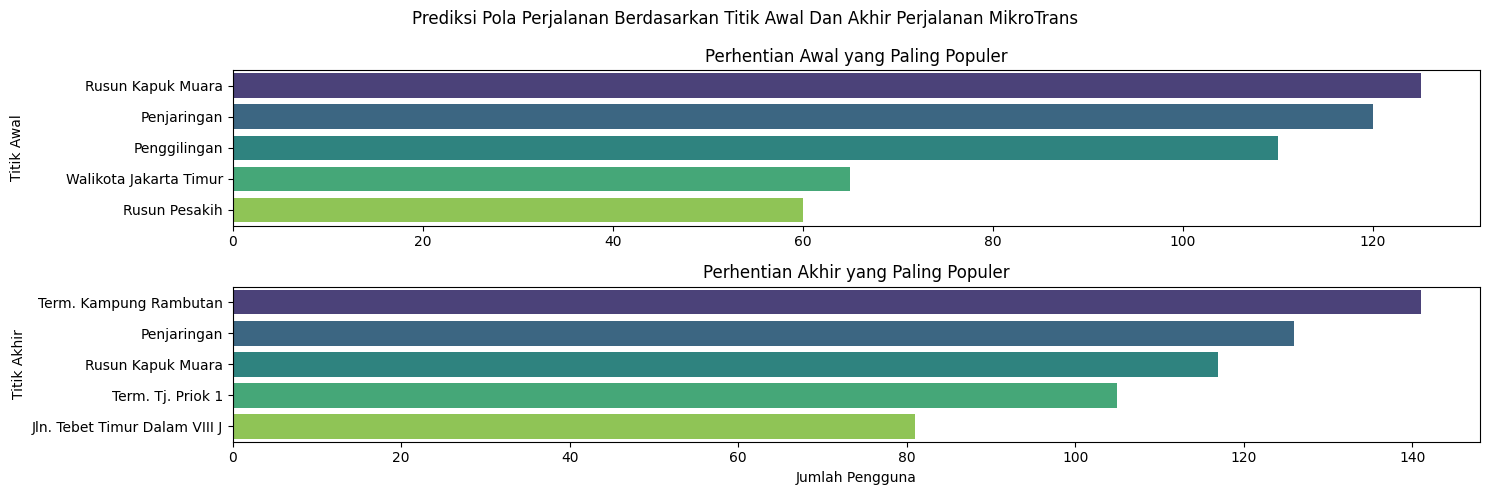

In [ ]:
x = dfraw[dfraw["busType"] == "MikroTrans"]

# Hitung frekuensi perhentian awal dan akhir
start_stops = x['tapInStopsName'].value_counts().nlargest(5).reset_index(name="count") # 5 titik awal paling populer
end_stops = x['tapOutStopsName'].value_counts().nlargest(5).reset_index(name="count")  # 5 titik akhir paling populer

fig = plt.figure(figsize=(15,5))
fig.suptitle('Prediksi Pola Perjalanan Berdasarkan Titik Awal Dan Akhir Perjalanan MikroTrans')

# Visualisasi perhentian awal
plt.subplot(2,1,1)
sns.barplot(
    data=start_stops,
    x="count",
    y="tapInStopsName",
    palette="viridis")
plt.title('Perhentian Awal yang Paling Populer')
plt.ylabel("Titik Awal",labelpad=30)
plt.xlabel("")

# Visualisasi perhentian akhir
plt.subplot(2,1,2)
sns.barplot(
    data=end_stops,
    x="count",
    y="tapOutStopsName",
    palette="viridis")
plt.title('Perhentian Akhir yang Paling Populer')
plt.ylabel("Titik Akhir")
plt.xlabel("Jumlah Pengguna")

plt.tight_layout()
plt.show()

Insight:

Titik Awal
1. TransJakarta
* Perhentian awal yang paling populer adalah "Garuda Taman Mini"
2. RoyalTrans
* Perhentian awal yang paling populer adalah "Gelora Bung Karno 1" dan "Bundaran Senayan 1"
3. MikroTrans
* Perhentian awal yang paling populer adalah "Rusun Kapuk Muara", "Penjaringan" dan "Penggilingan"

Titik Akhir
1. TransJakarta
* Perhentian akhir yang paling populer adalah "BKN"
2. RoyalTrans
* Perhentian akhir yang paling populer adalah "St. MRT Fatmawati"
3. MikroTrans
* Perhentian akhir yang paling populer adalah "Term. Kampung Rambutan" dan "Penjaringan"

Pastikan titik awal dan akhir mudah diakses oleh pengguna. Ini dapat melibatkan perbaikan infrastruktur seperti trotoar, penandaan jalan, atau bahkan koneksi dengan moda transportasi lain seperti kereta api atau MRT.

Memastikan bahwa armada transportasi dalam kondisi baik dan selalu tersedia. Pemeliharaan yang teratur dan peningkatan armada jika diperlukan akan membantu menjaga keandalan layanan.

Gunakan teknologi seperti aplikasi seluler untuk memberikan informasi real-time kepada pengguna, seperti estimasi waktu kedatangan dan pembaruan lalu lintas. Ini dapat meningkatkan kenyamanan pengguna dan membantu mereka merencanakan perjalanan mereka.

Pelatihan untuk pengemudi dan staf pelayanan pelanggan untuk memberikan pelayanan yang baik kepada penumpang sangat penting. Pengemudi yang ramah dan membantu dapat meningkatkan kepuasan pengguna.

Pertimbangkan untuk menggunakan armada yang ramah lingkungan, seperti bus listrik atau penggunaan bahan bakar yang lebih bersih, untuk mengurangi dampak lingkungan.

#### B. Analisis Jam Puncak Perjalanan

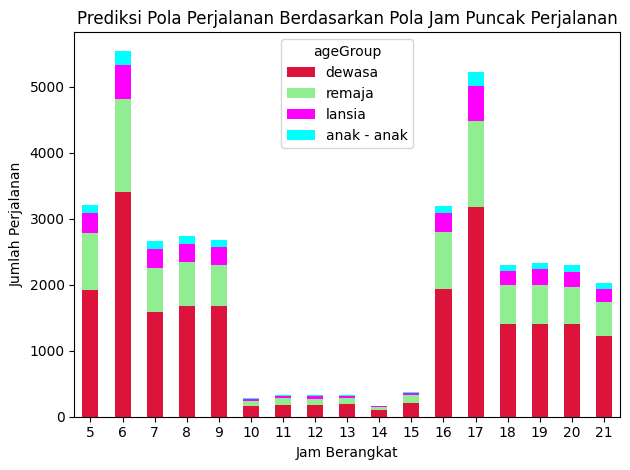

In [42]:
agegrouping = dfraw.copy()
agegrouping["ageGroup"] = agegrouping['ageGroup'].astype(pd.CategoricalDtype(categories=hue_orders, ordered=True))

x = agegrouping.groupby(['startHour', 'ageGroup']).size().unstack(fill_value=0)

fig.suptitle('Segmentasi Pengguna Berdasarkan Rute Perjalanan')

colors = {'anak - anak': 'aqua', 'remaja': 'lightgreen', 'dewasa': 'crimson', 'lansia': 'magenta'}

x.plot(kind='bar', stacked=True, color=colors)
plt.title('Prediksi Pola Perjalanan Berdasarkan Pola Jam Puncak Perjalanan')
plt.xlabel('Jam Berangkat')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

Insight:
* Pola jam puncak perjalanan menunjukkan dua puncak, satu di pagi hari sekitar jam 5-9 pagi dan satu lagi di sore hari sekitar jam 4-9 malam, dengan puncaknya jam 6 pagi dan jam 5 sore.
* pada puncak jam 6 pagi dan 5 sore jumlah seluruh pengguna dari semua kalangan meningkat hampir 2x lipat dibandingkan dengan saat jam puncak normal.

Sesuaikan penjadwalan kendaraan dengan pola jam puncak yang ada. Pastikan ada lebih banyak kendaraan yang beroperasi pada jam-jam puncak, terutama pada jam 6 pagi dan 5 sore. Ini dapat membantu mengatasi lonjakan permintaan.

Pertimbangkan untuk memiliki rute khusus atau moda transportasi tambahan selama jam puncak, terutama jika lonjakan permintaan sangat signifikan. Rute-rute ini dapat mengurangi kepadatan pada rute utama dan mempercepat perjalanan.

Sediakan informasi real-time kepada penumpang mengenai perkiraan waktu tiba kendaraan selama jam puncak. Hal ini akan membantu penumpang merencanakan perjalanan mereka dan mengurangi ketidakpastian.

Tingkatkan infrastruktur di halte yang sering digunakan pada jam puncak. Ini termasuk penambahan shelter, peningkatan aksesibilitas, dan fasilitas penunjang seperti toilet.

Investasikan dalam penambahan armada kendaraan selama jam puncak. Hal ini dapat membantu mengatasi lonjakan permintaan tanpa mengorbankan kenyamanan penumpang.

Tingkatkan promosi transportasi publik dengan kampanye yang mendorong masyarakat untuk menggunakan transportasi umum selama jam puncak guna mengurangi kemacetan.

##### Analisis Rata - Rata Lama Perjalanan Pada Saat Jam Puncak

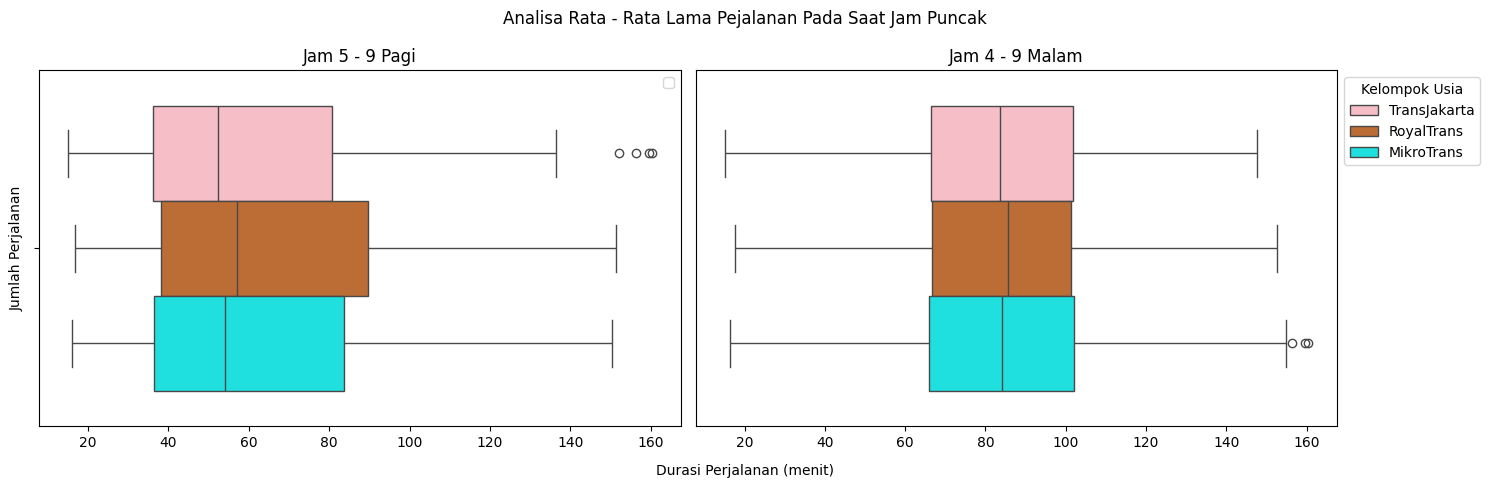

Distribusi Waktu Perjalanan Jam Pagi 36 - 82, Dengan Puncak Distribusi sekitar 48 - 58
Distribusi Waktu Perjalanan Jam Pagi 66 - 102, Dengan Puncak Distribusi sekitar 79 - 89


In [ ]:
Pagi = dfraw[(dfraw["startHour"] >= 5) & (dfraw["startHour"] <= 9)]
Malam = dfraw[(dfraw["startHour"] >= 16) & (dfraw["startHour"] <= 21)]

color_cus = {"TransJakarta": "lightpink", "RoyalTrans": "chocolate", "MikroTrans": "aqua"}

# variable yang dapat digunakan untuk merubah outliers menjadi median
Q1P = round(Pagi["tripMinutes"].quantile(0.25))                 # quartil 1
Q2P = round(Pagi["tripMinutes"].quantile(0.50))                 # quartil 2
Q3P = round(Pagi["tripMinutes"].quantile(0.75))                 # quartil 3
Q1M = round(Malam["tripMinutes"].quantile(0.25))                # quartil 1
Q2M = round(Malam["tripMinutes"].quantile(0.50))                # quartil 2
Q3M = round(Malam["tripMinutes"].quantile(0.75))                # quartil 3

fig = plt.figure(figsize=(15,5))
fig.suptitle('Analisa Rata - Rata Lama Pejalanan Pada Saat Jam Puncak')

# Visualisasi pemberhentian ketika Pagi
plt.subplot(1,2,1)
sns.boxplot(data=Pagi,
            x="tripMinutes",
            hue="busType",
            palette=color_cus,
            fill=True)
plt.title('Jam 5 - 9 Pagi')
plt.legend("")
plt.xlabel('')
plt.ylabel('Jumlah Perjalanan')

# Visualisasi Pemberhentian ketika Malam
plt.subplot(1,2,2)
sns.boxplot(data=Malam,
            x="tripMinutes",
            hue="busType",
            palette=color_cus,
            fill=True)
plt.title('Jam 4 - 9 Malam')
plt.legend(title='Kelompok Usia',bbox_to_anchor=(1, 1))
plt.xlabel(' ',labelpad=15)
plt.ylabel('')
plt.yticks([])

fig.text(0.5, 0.05, 'Durasi Perjalanan (menit)', ha='center')

plt.tight_layout()
plt.show()
print(f"Distribusi Waktu Perjalanan Jam Pagi {Q1P} - {Q3P}, Dengan Puncak Distribusi sekitar {Q2P-5} - {Q2P+5}")
print(f"Distribusi Waktu Perjalanan Jam Pagi {Q1M} - {Q3M}, Dengan Puncak Distribusi sekitar {Q2M-5} - {Q2M+5}")

Insight

1. Jam Pagi:
* Lama waktu perjalanan cenderung berkisar antara 36 - 82 menit, dengan puncak distribusi sekitar 48 - 58 menit.
* Pengguna cenderung menghabiskan waktu sekitar 48 - 58 menit dalam perjalanan.

2. Jam Malam:
* Lama waktu perjalanan cenderung berkisar antara 66 - 102 menit, dengan puncak distribusi sekitar 79 - 89 menit.
* Pengguna cenderung menghabiskan waktu sekitar 79 - 89 menit dalam perjalanan.

Rancang jadwal yang sesuai dengan pola waktu perjalanan yang ada. Misalnya, pada jam pagi, pastikan ada lebih banyak kendaraan yang beroperasi untuk mengatasi lonjakan permintaan yang umumnya terjadi dalam rentang waktu 48-58 menit. Sebaliknya, pada jam malam, pastikan kendaraan tersedia lebih lama untuk mengakomodasi waktu perjalanan yang cenderung lebih lama.

Gunakan teknologi dan sistem pemantauan real-time untuk mengidentifikasi perubahan lalu lintas atau keadaan cuaca yang dapat mempengaruhi waktu perjalanan. Dengan pemantauan ini, Anda dapat menyesuaikan rute atau jadwal secara dinamis untuk menghindari keterlambatan.

Kumpulkan masukan dari pengguna mengenai pengalaman mereka dengan transportasi umum. Buat platform atau aplikasi yang memungkinkan pengguna memberikan umpan balik tentang waktu perjalanan, kenyamanan, dan kebutuhan mereka. Hal ini dapat membantu Anda memahami kebutuhan pengguna dan beradaptasi secara lebih baik.

Jika mungkin, pertimbangkan untuk menambah kapasitas pada bus atau angkot pada jam-jam dengan lonjakan permintaan. Hal ini dapat membantu mengurangi kepadatan dan meningkatkan kenyamanan penumpang.

Sediakan informasi real-time kepada penumpang mengenai perkiraan waktu perjalanan dan estimasi kedatangan. Dengan cara ini, penumpang dapat merencanakan perjalanan mereka dengan lebih baik.

# Kesimpulan dan Rekomendasi 

**Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang penggunaan transportasi umum:

1. Mayoritas Usia Pengguna
* Mayoritas pengguna adalah dewasa, sementara Jumlah anak - anak dan lansia lebih rendah dibandingkan dengan dewasa dan remaja.
2. Rute Paling Populer Berdasarkan Usia Pengguna

TransJakarta :
* Rute "Ciputat - CSW" adalah rute yang paling populer
* tidak ada rute yang populer dikalangan anak - anak
* ada 2 rute yang populer dikalangan lansia yaitu "Kebayoran - Lama" dan "Kalideres Bundarah HI via veteran"

RoyalTrans :
* Rute "Cibubur - Balai Kota" adalah rute yang paling populer
* tidak ada rute yang populer dikalangan lansia
* ada 3 rute yang populer dikalangan anak - anak yaitu "Palem Semi - Bundaran Senayan", "Cibubur Junction - Blok M" dan "Cibubur - Balai Kota"

MikroTrans :
* Rute "Kampung Rambutan - Pondok Gede" adalah satu - satunya rute yang paling populer dkalangan anak - anak
* Rute yang paling populer adalah "Rusun Pondok Bambu - WaliKota Jakarta Timur" dan "Penjaringan" dan "Kampung Rambutan - Pondok Gede"
3. Perhentian Awal dan Akhir yang Paling Populer

TransJakarta 
* Perhentian awal yang paling populer adalah "Garuda Taman Mini", sementara perhentian akhir yang paling populer adalah "BKN".
* Ini menunjukkan bahwa sebagian besar pengguna memulai perjalanan mereka dari "Garuda Taman Mini" dan mengakhiri di "BKN".

RoyalTrans
* Perhentian awal yang paling populer adalah "Gelora Bung Karno 1" dan "Bundaran Senayan 1", sementara perhentian akhir yang paling populer adalah "St. MRT Fatmawati".
* Ini menunjukkan bahwa sebagian besar pengguna memulai perjalanan mereka dari "Gelora Bung Karno 1" dan "Bundaran Senayan 1" dan mengakhiri di "St. MRT Fatmawati".

MikroTrans 
* Perhentian awal yang paling populer adalah "Rusun Kapuk Muara", "Penjaringan" dan "Penggilingan", sementara perhentian akhir yang paling populer adalah "Term. Kampung Rambutan" dan "Penjaringan".
* Ini menunjukkan bahwa sebagian besar pengguna memulai perjalanan mereka dari "Rusun Kapuk Muara", "Penjaringan" dan "Penggilingan" dan mengakhiri di "Term. Kampung Rambutan" dan "Penjaringan".
4. Pola Jam Puncak Perjalanan
* Terdapat dua puncak jam puncak perjalanan, yaitu di pagi hari sekitar jam 5-9 pagi dan di sore hari sekitar jam 4-9 sore, dengan puncaknya jam 6 pagi dan jam 5 sore.
* pada puncak jam 6 pagi dan 5 sore jumlah seluruh pengguna meningkat mendekati 2x lipat dibandingkan dengan saat jam puncak normal.
* Ini menunjukkan bahwa sebagian besar pengguna mulai beraktifitas pada jam 6 pagi dan 5 sore.
5. Distribusi Waktu Perjalanan

Jam Pagi:
* Lama waktu perjalanan cenderung berkisar antara 36 - 82 menit, dengan puncak distribusi sekitar 48 - 58 menit.
* Pengguna cenderung menghabiskan waktu sekitar 48 - 58 menit dalam perjalanan.

Jam Malam:
* Lama waktu perjalanan cenderung berkisar antara 66 - 102 menit, dengan puncak distribusi sekitar 79 - 89 menit.
* Pengguna cenderung menghabiskan waktu sekitar 79 - 89 menit dalam perjalanan.

**Rekomendasi**
1. Peningkatan Kualitas pada Rute Populer 
* Sesuaikan jumlah armada dan frekuensi layanan berdasarkan popularitas rute dan kelompok usia pengguna. Rute-rute yang paling populer harus memiliki lebih banyak bus atau angkutan untuk mengatasi permintaan tinggi.
* Untuk rute-rute yang populer di kalangan lansia dan anak-anak, pertimbangkan untuk menyediakan pelayanan khusus yang memenuhi kebutuhan mereka. Ini dapat mencakup kenyamanan tambahan, bantuan naik-turun, atau fasilitas khusus.
* Pastikan bahwa informasi mengenai rute-rute populer dan layanan khusus diinformasikan dengan baik kepada pengguna. Gunakan berbagai media, termasuk papan informasi di halte dan aplikasi seluler, untuk memberikan informasi yang jelas dan akurat.
* Jika rute tertentu sangat populer, pertimbangkan untuk mengembangkan rute alternatif yang mengurangi tekanan pada rute utama. Ini dapat membantu mengurangi kemacetan dan memperbaiki efisiensi operasional.
* Pastikan armada dalam kondisi yang baik dan memastikan keselamatan penumpang, terutama jika ada banyak anak-anak yang menggunakan layanan. Pastikan juga ada fasilitas yang aman dan nyaman di halte dan dalam angkutan.
* Untuk rute-rute yang tidak populer di kalangan anak-anak dan lansia, pertimbangkan untuk melakukan kampanye pemasaran yang ditargetkan pada keluarga, sekolah dan pusat perbelanjaan. Ini dapat membantu menarik lebih banyak penumpang dalam kelompok usia ini.

2. Peningkatan Kualitas pada Perhentian Awal dan Akhir
* Pastikan perhentian awal dan akhir memiliki fasilitas dan pelayanan yang baik untuk meningkatkan pengalaman pengguna, Peningkatan dapat berupa informasi perjalanan dan kenyamanan penumpang atau tanda-tanda arah dan informasi perjalanan yang jelas.
* Gunakan teknologi seperti aplikasi seluler untuk memberikan informasi real-time kepada pengguna, seperti estimasi waktu kedatangan dan pembaruan lalu lintas. Ini dapat meningkatkan kenyamanan pengguna dan membantu mereka merencanakan perjalanan mereka.
* Pelatihan untuk pengemudi dan staf pelayanan pelanggan untuk memberikan pelayanan yang baik kepada penumpang sangat penting. Pengemudi yang ramah dan membantu dapat meningkatkan kepuasan pengguna.
* Tingkatkan infrastruktur di pemberhentian yang populer. Ini termasuk penambahan shelter, peningkatan aksesibilitas, dan fasilitas penunjang seperti toilet.
3. Penjadwalan Tambahan dan  Pelayanan yang Konsisten pada Jam Puncak.
* Selama jam puncak pagi dan sore, pertimbangkan untuk menambahkan lebih banyak layanan keamanan atau penjadwalan tambahan untuk menghindari kerumunan dan keterlambatan.
* Pertimbangkan untuk memiliki rute khusus atau moda transportasi tambahan selama jam puncak, terutama jika lonjakan permintaan sangat signifikan. Rute-rute ini dapat mengurangi kepadatan pada rute utama dan mempercepat perjalanan.
* Sediakan informasi real-time kepada penumpang mengenai perkiraan waktu tiba kendaraan selama jam puncak. Hal ini akan membantu penumpang merencanakan perjalanan mereka dan mengurangi ketidakpastian.
* Tingkatkan promosi transportasi publik dengan kampanye yang mendorong masyarakat untuk menggunakan transportasi umum selama jam puncak guna mengurangi kemacetan.
* Rancang jadwal yang sesuai dengan pola waktu perjalanan yang ada. Misalnya, pada jam pagi, pastikan ada lebih banyak kendaraan yang beroperasi untuk mengatasi lonjakan permintaan yang umumnya terjadi dalam rentang waktu 48-58 menit. Sebaliknya, pada jam malam, pastikan kendaraan tersedia lebih lama untuk mengakomodasi waktu perjalanan yang cenderung lebih lama.
* Gunakan teknologi dan sistem pemantauan real-time untuk mengidentifikasi perubahan lalu lintas atau keadaan cuaca yang dapat mempengaruhi waktu perjalanan. Dengan pemantauan ini, Anda dapat menyesuaikan rute atau jadwal secara dinamis untuk menghindari keterlambatan.
* Jika mungkin, pertimbangkan untuk menambah kapasitas pada armada pada jam-jam dengan lonjakan permintaan. Hal ini dapat membantu mengurangi kepadatan dan meningkatkan kenyamanan penumpang.

Kumpulkan masukan dari pengguna mengenai pengalaman mereka dengan transportasi umum. Buat platform atau aplikasi yang memungkinkan pengguna memberikan umpan balik tentang waktu perjalanan, kenyamanan, dan kebutuhan mereka. Hal ini dapat membantu Anda memahami kebutuhan pengguna dan beradaptasi secara lebih baik.

Rekomendasi ini mencakup peningkatan kualitas layanan dan penjadwalan yang lebih baik yang bertujuan untuk meningkatkan efisiensi operasional, memaksimalkan kepuasan pengguna, dan meraih kesuksesan jangka panjang. Terus memantau data dan menyesuaikan strategi sesuai dengan temuan dan kebutuhan pengguna akan membantu meningkatkan pengalaman pelanggan dan efisiensi operasional.